### Embeddings

In [3]:
# libraies
# install nltk, gensim library
# !pip install nltk gensim

import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nltk.download("brown")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\davis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [4]:
# loading preprocessed corpus
sentences = brown.sents()

In [5]:
# inspect
print("Totla number of sentences ", len(sentences))
print("Totla number of words ", len(brown.words()))
print("Totla number of unique words ", len(set(brown.words())))

Totla number of sentences  57340
Totla number of words  1161192
Totla number of unique words  56057


In [6]:
# sample of corpus
sentences[4]

['The',
 'jury',
 'said',
 'it',
 'did',
 'find',
 'that',
 'many',
 'of',
 "Georgia's",
 'registration',
 'and',
 'election',
 'laws',
 '``',
 'are',
 'outmoded',
 'or',
 'inadequate',
 'and',
 'often',
 'ambiguous',
 "''",
 '.']

In [7]:
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [8]:
# Get the embedding of a word
vector = model.wv["money"]
print("All values of 'money' vector: ", vector)

All values of 'money' vector:  [ 1.41885699e-04  1.27890296e-02  2.52629101e-01  6.26180917e-02
 -4.08465773e-01 -4.26543385e-01  5.73854566e-01  3.76281947e-01
 -2.66613871e-01  3.87351096e-01 -5.65855980e-01 -9.66740325e-02
  1.98656082e-01  9.81197953e-02 -4.74217013e-02 -2.67073065e-01
  2.78871387e-01 -6.95172310e-01 -3.72764766e-01 -6.92064643e-01
  4.19004679e-01  1.77373499e-01  1.05508256e+00  5.33516824e-01
 -2.03290954e-01 -3.81660283e-01 -2.61460021e-02 -6.22197330e-01
 -6.44782782e-01 -1.07489616e-01  9.01746035e-01 -5.46954811e-01
  7.53656328e-01 -7.10080743e-01  1.54332772e-01  3.04310739e-01
 -9.00811911e-01 -1.54954374e-01 -5.65418422e-01 -5.44592261e-01
 -1.43920958e-01 -2.05383807e-01  1.24950722e-01  1.29333556e-01
  4.20165241e-01  5.26093841e-01 -4.65110213e-01  1.29716441e-01
 -1.70258582e-01  5.19887030e-01  3.89980316e-01 -6.12102032e-01
 -4.98553485e-01  1.72767937e-02 -3.72561157e-01 -2.21042693e-01
  5.37863374e-01 -3.30348201e-02 -7.05201149e-01 -1.4819453

In [9]:
len(vector)

100

In [10]:
# Find similar words
similar = model.wv.most_similar("money", topn=10)
for word, score in similar:
    print(f"{word} : {score}")

care : 0.9226414561271667
work : 0.8983083963394165
trouble : 0.889788031578064
job : 0.887516438961029
something : 0.8844672441482544
freedom : 0.8801596164703369
reasonable : 0.8785440325737
opportunity : 0.8746027946472168
ability : 0.8733331561088562
trying : 0.8709639310836792


In [11]:
# Viswalize EMbeddings
words = ["money", "bank", "finance", "loan", "cash", "house", "salary", "fund", "expense", "wealth", "debt"]
vectors = [model.wv[word] for word in words]

In [12]:
vectors

[array([ 1.41885699e-04,  1.27890296e-02,  2.52629101e-01,  6.26180917e-02,
        -4.08465773e-01, -4.26543385e-01,  5.73854566e-01,  3.76281947e-01,
        -2.66613871e-01,  3.87351096e-01, -5.65855980e-01, -9.66740325e-02,
         1.98656082e-01,  9.81197953e-02, -4.74217013e-02, -2.67073065e-01,
         2.78871387e-01, -6.95172310e-01, -3.72764766e-01, -6.92064643e-01,
         4.19004679e-01,  1.77373499e-01,  1.05508256e+00,  5.33516824e-01,
        -2.03290954e-01, -3.81660283e-01, -2.61460021e-02, -6.22197330e-01,
        -6.44782782e-01, -1.07489616e-01,  9.01746035e-01, -5.46954811e-01,
         7.53656328e-01, -7.10080743e-01,  1.54332772e-01,  3.04310739e-01,
        -9.00811911e-01, -1.54954374e-01, -5.65418422e-01, -5.44592261e-01,
        -1.43920958e-01, -2.05383807e-01,  1.24950722e-01,  1.29333556e-01,
         4.20165241e-01,  5.26093841e-01, -4.65110213e-01,  1.29716441e-01,
        -1.70258582e-01,  5.19887030e-01,  3.89980316e-01, -6.12102032e-01,
        -4.9

In [13]:
# reduce to 2D
pca = PCA(n_components=2)
points = pca.fit_transform(vectors)

In [14]:
points

array([[ 2.18552925, -2.05723272],
       [-0.37038069,  0.50397355],
       [-0.82788425, -0.1277566 ],
       [-0.50663414,  0.17740569],
       [-0.56945155, -0.16548835],
       [ 3.27892137,  1.45457879],
       [-0.87074402,  0.14494446],
       [-0.42222217,  0.33831006],
       [-0.16469299, -0.2340629 ],
       [-0.8129535 ,  0.01738372],
       [-0.91948731, -0.05205569]])

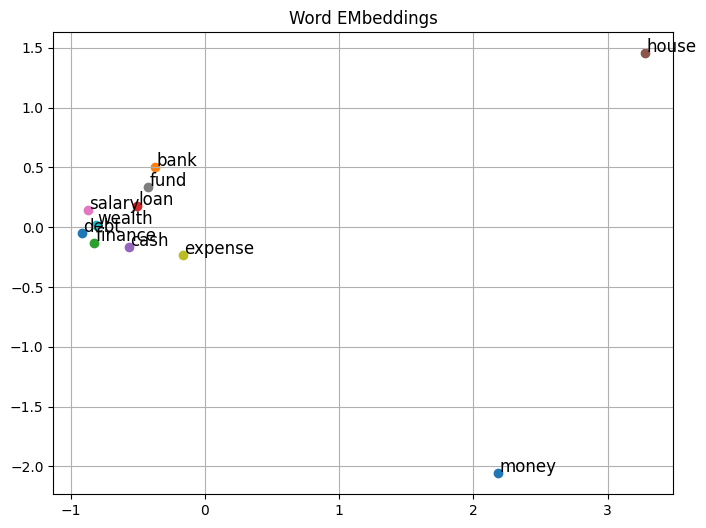

In [15]:
# Plot for visuals
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = points[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word EMbeddings")
plt.grid(True)
plt.show()

In [16]:
print(model.wv.similarity("money", "salary"))
print(model.wv.similarity("money", "bank"))
print(model.wv.similarity("money", "house"))

0.5016352
0.5567699
0.7048624
